# TIL6022 - Final Assignment
Members: Joris Voogt, Xiaoyu Mao, Yuwen Peng  
Student numbers: 4295978, 5947642, 5914507

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

- RQ: GDP is used to represent the economic development of countries, on the basis of which the changes in the scale of road and rail passenger transport in European countries in recent years and its impact on road traffic safety are analysed.

This research will focus on passenger transport trends and safety issues in Europe. We will analyse the relationship between transport mode choice and the economy in different countries.
The GDP is used to represent the economic development of the country, on the basis of which we will analyse the changes in the scale of road and rail passenger transport in European countries in recent years. By analyzing the volume of rail passenger and road passenger transport ,we can find the proportion of both in the overall volume of transport. 
Then we can discuss whether there are countries who are highly dependent on road transport, and then we select the countries who have a large proportion of road transport to analyze the relationship between GDP and traffic safety.

Time scale: Data is a bit limited for passenger transport, so most likely in the range of 2016-2021.
Geographical boundary: Countries in Europe. Not all of them have data available in the datasets, so countries with most data available will be analysed.
 
A short list of how we plan to do this analysis:

1. The volume of passenger transport relative to GDP can give the relative scale of passenger transport in the national economy. Visualise it by creating an interactive map of Europe with different colors for each country based on the data, representing levels of the volume of passenger transport relative to GDP for different transport modes.

2.  Analyse the changes in the scale of road and rail passenger transport in European countries in recent years. By analysing the volume of rail passenger transport and road passenger transport in each country and drawing a scale diagram, we can find out the proportion of the two in the overall volume of transport; and drawing a line graph can show the changes in recent years.

3.  Further explore the impact of transport investment on transport safety. Discuss whether there are countries in 2 that are highly dependent on road transport, and then select countries with a large share of road transport to analyse the relationship between GDP and traffic safety.


4. Look for other possible factors that could be related to traffic mortality rate. Such as proportions of motorways, GDP per capita, alcohol consumption. This data is likely leading to new relationships and possibly correlates. Therefore, a correlation matrix is used, measuring strength and quickly giving an overview of all the numerical correlations.

5. To more scientifically evaluate the relationship between traffic mortality rate and other factors, it would be better to establish a regression model. The result obtained will tell us whether there is a positive or negative relationship between them. (if we have enough time) 

6. Summarize and propose ideas about transport patterns in the future and strategize about road safety.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import mplcursors

# Part I - Data Import
- create new data frame
- clean the useless columns and rows from the original data
- rename the data columns and rows to be more clearly

In [3]:
# Import Volume of passenger transport relative to GDP: Read the csv file as a dataframe
file_path_pg_GDP = r'C:\Users\猫小鱼\Desktop\TIL\Programming\final project\data\pg_GDP.csv'
df_pg_GDP = pd.read_csv(file_path_pg_GDP)

# Rename columns and rows
df_pg_GDP.columns = df_pg_GDP.iloc[6].tolist()
df_pg_GDP = df_pg_GDP.rename(columns={df_pg_GDP.columns[0]: 'GEO'})

# Clean the data by dropping columns of the dataframe that will not be used
# These rows are used to indicate the data, and columns are used to explain the accuracy of the data
df_pg_GDP = df_pg_GDP.iloc[8:48]
columns_to_remove = [2,4,6,8,10,12,14,16,18,20,22,24]
df_pg_GDP = df_pg_GDP.drop(df_pg_GDP.columns[columns_to_remove], axis=1 )
columns_to_remove = [7]
df_pg_GDP = df_pg_GDP.drop(df_pg_GDP.columns[columns_to_remove], axis=1 )

# Delete the rows without data and use Euro area or country as the row name
df_pg_GDP = df_pg_GDP.set_index('GEO')
df_pg_GDP = df_pg_GDP[~(df_pg_GDP == ':').all(axis=1)]

df_pg_GDP

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GEO,,,,,,,,,,,,
European Union - 27 countries (from 2020),103.7,102.2,100.9,100.8,100.1,100,100,98.3,96.6,95.4,79.2,80.2
Belgium,114.1,110.5,114,111.5,103.7,100,97.4,96.6,95.5,93.8,80.9,79.9
Bulgaria,91.5,91.2,91.9,94.4,99.1,100,95.9,93.9,89.7,88.7,75.4,72.3
Czechia,101.2,100,99.6,100.7,103.1,100,100.7,99.2,100.9,101.5,83.8,99.2
Denmark,98.7,99.5,98.7,97.7,98.1,100,99.8,98.6,97.2,98.2,88.4,85.9
Germany,101.4,101,101.1,100.9,100.2,100,100,94.6,93.8,91.1,79.9,76.1
Estonia,95.1,90.6,91.9,93.9,95.9,100,104.2,99.8,97.8,100.2,79.1,77.7
Ireland,128.7,126,123.4,125.2,114.3,100,103.8,98.8,93,90.5,70.1,65.7
Greece,82.6,90.6,96.3,98,98.4,100,101.6,101.7,101.3,100.9,91.6,90.3


In [4]:
# Import Rail transport of passengers: Read the csv file as a dataframe
file_path_rail_pg = r'C:\Users\猫小鱼\Desktop\TIL\Programming\final project\data\rail_pg.csv'
df_rail_pg = pd.read_csv(file_path_rail_pg)

# Rename columns and rows
df_rail_pg.columns = df_rail_pg.iloc[7].tolist()
df_rail_pg = df_rail_pg.rename(columns={df_rail_pg.columns[0]: 'GEO'})

# Clean the data by dropping columns of the dataframe that will not be used
df_rail_pg = df_rail_pg.iloc[9:49]
columns_to_remove = [2,4,6,8,10,12,14,16,18,20,22,24]
df_rail_pg = df_rail_pg.drop( df_rail_pg.columns[columns_to_remove], axis=1 )

# Delete the rows without data and use European region or country as the row name
df_rail_pg = df_rail_pg.set_index('GEO')
df_rail_pg = df_rail_pg[~(df_rail_pg == ':').all(axis=1)]

df_rail_pg

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
GEO,,,,,,,,,,,,
European Union - 27 countries (from 2020),:,:,:,:,"375,713","384,335","394,142","400,427","413,923","223,668","260,715",:
Belgium,"10,498",:,:,:,:,:,:,:,:,:,:,:
Bulgaria,"2,059","1,870","1,821","1,698","1,549","1,455","1,434","1,476","1,520","1,118","1,203","1,600"
Czechia,:,"7,196","7,512","7,644","8,125","8,738","9,403","10,220","10,856","6,623","6,752","9,394"
Denmark,"6,395","6,534","6,566","6,513","6,507","6,332","6,280","6,182","6,174","3,940","4,181",:
Germany,"89,316","93,918","89,450","90,978","91,050","95,465","95,529","98,161","100,252","57,787","57,518",:
Estonia,243,235,223,280,286,316,366,417,392,263,290,382
Ireland,"1,638","1,578","1,569","1,728","1,918","1,991","2,122","2,281","2,399",834,870,"1,748"
Greece,958,832,"1,056","1,072","1,263","1,192","1,112","1,104","1,252",640,653,"1,117"


In [4]:
# Import Rail transport of passengers: Read the csv file as a dataframe
file_path_road_pg = r'C:\Users\猫小鱼\Desktop\TIL\Programming\final project\data\road_pg.csv'
df_road_pg = pd.read_csv(file_path_road_pg)

# Rename columns and rows
df_road_pg.columns = df_road_pg.iloc[7].tolist()
df_road_pg = df_road_pg.rename(columns={df_road_pg.columns[0]: 'GEO'})

# Clean the data by dropping columns of the dataframe that will not be used
# After observation, it was found that they are all sequence numbers with double digits
# Remove double numbered columns starting from the fourth column with index 3
df_road_pg = df_road_pg.iloc[9:37]
columns_to_keep = df_road_pg.columns[:1].to_list()
columns_to_remove = df_road_pg.columns[1::2]
df_road_pg = df_road_pg[columns_to_keep + columns_to_remove.to_list()]

# Delete the rows without data and use European region or country as the row name
df_road_pg = df_road_pg.set_index('GEO')
df_road_pg = df_road_pg[~(df_road_pg == ':').all(axis=1)]

df_road_pg

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GEO,,,,,,,,,,
Belgium,"135,070","132,615",:,:,:,:,:,:,:,:
Bulgaria,"8,949.9","8,666.600","9,919.700","10,017.800","9,548.600","8,916.900","8,017.500","8,952.700","4,803","4,611.600"
Czechia,"78,719","79,382",:,"84,829","87,257","90,049","94,193","97,320","77,771","96,722"
Denmark,:,"66,794","68,140","70,962","73,393","74,468","74,934",:,"69,742","70,835"
Germany,"990,582","998,566","1,013,748","1,027,500","1,048,003","1,015,350","1,013,700","996,500","866,646","846,687"
Spain,"377,544","370,310","350,393","366,092",:,:,:,:,:,:
France,"866,611","820,574.555","832,529.564","842,236.878","853,941.829","860,795.493","858,871.767","851,213.581","677,341","769,146.410"
Croatia,"30,586","30,859","30,962","31,171","31,455","31,862","30,962","30,962","23,675","27,201"
Italy,"728,482","770,590","787,387","820,184","847,244","885,458","857,727","875,911","579,844","633,684"


In [ ]:
# Import Road Infrustructure Investment Spending: Read the csv file as a dataframe
file_path_road_inv = r'C:\Users\猫小鱼\Desktop\TIL\Programming\final project\data\road_inv.csv'
df_road_inv = pd.read_csv(file_path_road_inv)

# First clean the data by dropping columns of the dataframe that will not be used
df_road_inv = df_road_inv.iloc[4:56]
# Remove double numbered columns starting from the fourth column with index 3
columns_to_keep = df_road_inv.columns[:1].to_list()
columns_to_remove = df_road_inv.columns[3::2]
df_road_inv = df_road_inv[columns_to_keep + columns_to_remove.to_list()]

# Rename columns and rows
new_column_names = [str(year) for year in range(1999, 2022)]
df_road_inv.columns = new_column_names
df_road_inv = df_road_inv.rename(columns={df_road_inv.columns[0]: 'GEO'})

# Delete the rows without data and use European region or country as the row name
df_road_inv = df_road_inv.set_index('GEO')
df_road_inv = df_road_inv[~(df_road_inv == '..').all(axis=1)]

df_road_inv

In [ ]:
# Import Road Infrustructure Maintenance Spending: Read the csv file as a dataframe
file_path_road_maint = r'C:\Users\猫小鱼\Desktop\TIL\Programming\final project\data\road_maint.csv'
df_road_maint = pd.read_csv(file_path_road_maint)

# Rename columns and rows
df_road_maint.columns = df_road_maint.iloc[2].tolist()
df_road_maint = df_road_maint.rename(columns={df_road_maint.columns[0]: 'GEO'})

# Clean the data by dropping columns of the unit that is meaningless when the selected country are all from Europe
# Then remove the rows from original data for explaination
df_road_maint = df_road_maint.iloc[4:46]
columns_remove = [1]
df_road_maint = df_road_maint.drop( df_road_maint.columns[columns_remove], axis=1 )

# Delete the rows without data and use European region or country as the row name
df_road_maint = df_road_maint.set_index('GEO')
df_road_maint = df_road_maint[~(df_road_maint == '..').all(axis=1)]

df_road_maint

In [ ]:
# Import Road injury crashes, fatalities and injuries: Read the csv file as a dataframe
file_path_road_fat = r'C:\Users\猫小鱼\Desktop\TIL\Programming\final project\data\road_fat.csv'
df_road_fat = pd.read_csv(file_path_road_fat)

# First clean the data by dropping columns of the dataframe that will not be used
df_road_fat = df_road_fat.iloc[4:60]
# Remove double numbered columns starting from the fourth column with index 3
columns_to_keep = df_road_fat.columns[:1].to_list()
columns_to_remove = df_road_fat.columns[3::2]
df_road_fat = df_road_fat[columns_to_keep + columns_to_remove.to_list()]

# Rename columns and rows
new_column_names = [str(year) for year in range(1999, 2022)]
df_road_fat.columns = new_column_names
df_road_fat = df_road_fat.rename(columns={df_road_fat.columns[0]: 'GEO'})

# Use European region or country as the row name
df_road_fat = df_road_fat.set_index('GEO')

df_road_fat

In [ ]:
# Import Road fatalities per one hundrend thousand inhabitants: Read the csv file as a dataframe
file_path_fat_inh = r'C:\Users\猫小鱼\Desktop\TIL\Programming\final project\data\fat_inh.csv'
df_fat_inh = pd.read_csv(file_path_fat_inh)

# First clean the data by dropping columns of the dataframe that will not be used
# These rows are used to indicate the data, and columns are used to explain the accuracy of the data
df_fat_inh = df_fat_inh.iloc[3:62]

# Remove double numbered columns starting from the fourth column with index 3
columns_to_keep = df_fat_inh.columns[:1].to_list()
columns_to_remove = df_fat_inh.columns[2::2]
df_fat_inh = df_fat_inh[columns_to_keep + columns_to_remove.to_list()]

# Rename columns and rows
new_column_names = [str(year) for year in range(1999, 2022)]
df_fat_inh.columns = new_column_names
df_fat_inh = df_fat_inh.rename(columns={df_fat_inh.columns[0]: 'GEO'})

# Use European region or country as the row name
df_fat_inh = df_fat_inh.set_index('GEO')

df_fat_inh

In [ ]:
# Import GDP per capita: Read the csv file as a dataframe
file_path_GDP = r'C:\Users\猫小鱼\Desktop\TIL\Programming\final project\data\GDP.csv'
df_GDP = pd.read_csv(file_path_GDP)

# Remove the last row and use European region or country as the row name
df_GDP = df_GDP.iloc[:58]
df_GDP = df_GDP.rename(columns={df_GDP.columns[0]: 'GEO'})
df_GDP = df_GDP.set_index('GEO')

df_GDP

# Part II - Data processing

- Here we create an interactive map of Europe with standard colors for each country based on the Volume of passenger transport relative to GDP. The color variations representing different levels of the data. 
- A gradient color spectrum can be used so that countries with high ratios are shown in darker colors and countries with low ratios are shown in lighter colors.
- Add a timeline at the bottom or side of the map to represent the time range. Users can drag the timeline or click on different years to see the Volume of passenger transport relative to GDP for each country at different points in time.

In [6]:
# Here is the code of interactive map

"Volume of passenger transport relative to GDP" is a key economic indicator that provides insights into the relationship between the volume of passenger transportation servicesand the Gross Domestic Product (GDP) of a country or region.  
A high volume of passenger transport relative to GDP often indicates a robust and growing economy. When the volume of passenger transport is significant in comparison to the GDP, it suggests that the transportation sector is making a substantial contribution to economic growth.   
A high ratio may suggest that a country's economy relies heavily on transportation services, such as tourism, logistics, or commuting. In this case, fluctuations in transportation services may have a substantial impact on the overall economic health of the country.    
A low ratio relative to GDP might suggest that a country or region's transportation system is highly efficient. In such cases, the transportation sector doesn't need to consume a significant portion of the economic output to move people efficiently, indicating well-developed and cost-effective transport infrastructure.  
- The data on the "Volume of passenger transport relative to GDP" in the European Union from 2010 to 2022, with 2015 defined as 100, can be analyzed as follows:
1. Positive Trend:
    From 2010 to 2015, the ratio increased from 103.7 to 100, where 2015 was defined as 100. This indicates a relative increase in the volume of passenger transport in relation to GDP during this period. The passenger transport sector was playing an increasingly significant role in the European economy. This have been due to factors such as increased tourism, or infrastructure development and investment.
2. Stability:
    From 2016 to 2018, the ratio remained relatively stable, hovering around 100. This suggests that the passenger transport sector was maintaining its level of contribution to the economy, with no significant shifts in either direction.
3. Decline:
    From 2019 onwards, there was a notable decline. By 2022, the ratio had decreased to 80.2. This decline indicates a reduction in the relative contribution of the passenger transport sector to the GDP. This reduction could be influenced by various factors, such as changes in travel behavior (e.g.due to the COVID-19 pandemic), economic shifts, or increased efficiency in the transportation sector. No data augmentation after the pandemicmay because many people adapted to remote work and virtual meetings. As more people work from home, the need for daily commuting and business travel may decrease, impacting the passenger transport sector. Many businesses in the travel and tourism sectors suffered financial losses.Reduced business travel and tourism can lead to lower passenger transport relative to GDP.

Country name: France


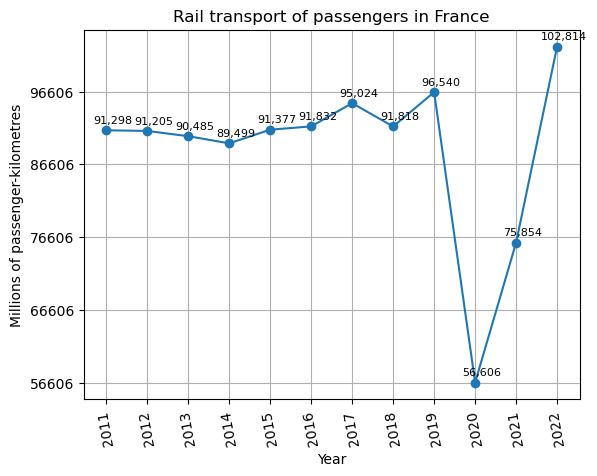

In [5]:
# Create line graph to disaplay the trend of rail passenger transport
country_name = input(f"Country name")

if country_name in df_rail_pg.index:
    # Obtain the selected country's data
    country_data = df_rail_pg.loc[country_name]
    # Obtain year as x-axis label
    years = country_data.index
    
    ## Obtain data as y-axis data
    data = country_data.str.replace(',', '').astype(int)
    
    #Remove commas and convert data to floating-point numbers while handling missing values
    filled_data = data.reindex(years).interpolate(method='linear')
    
    # Create line chart
    fig, ax = plt.subplots()
    ax.plot(years, data, marker='o', linestyle='-')
    ax.set_xlabel('Year')
    ax.set_ylabel('Millions of passenger-kilometres')
    ax.set_title(f'Rail transport of passengers in {country_name}')
    ax.grid(True)
    
    # Add data value labels
    for i, j in zip(years, data):
        ax.annotate(f"{j:,d}", xy=(i, j), xytext=(5,5), textcoords='offset points', fontsize=8, ha='center')
    
    ax.set_yticks(range(int(min(data)), int(max(data) + 1), 10000))
    plt.xticks(rotation=100)
    plt.show()
else:
    print(f"There's no data of {country_name}")